In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

data_path = './pitts30k'

# DataSet Analysis
## Numbers
We first count how many images we have in each dataset

In [45]:
dirs = ('test', 'train', 'val')
matrix = pd.DataFrame()
for d in dirs:
    matrix = pd.concat([matrix, pd.Series([len(os.listdir(data_path+'/images/'+d+'/database/')), len(os.listdir(data_path+'/images/'+d+'/queries/'))], index=('Database','Queries'), name=d)],  axis=1)
matrix

,test,train,val
Database,10000,10000,10000
Queries,6816,7416,7608


## Distribution of labels
Each image is tagged with a location, we analyze for each partition the distribution in the city, the two parameters that we are interested in are the UMTS coordinates on the two axes

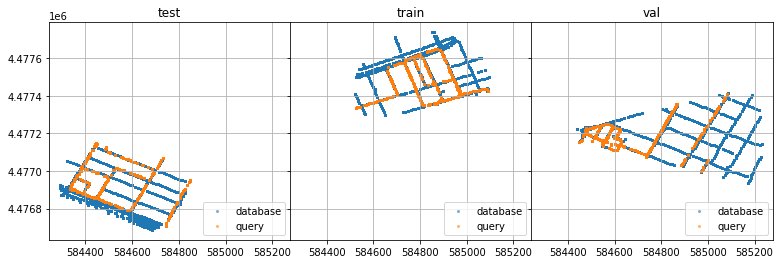

In [103]:
fig = plt.figure()
gs = fig.add_gridspec(1, 3, wspace=0, right=1.8)
axs = gs.subplots(sharex=True, sharey=True)
for i, dpath in enumerate(os.listdir(data_path+'/images/')):
    database = np.array([(path.split("@")[1], path.split("@")[2]) for path in os.listdir(data_path+'/images/'+dpath+'/database/')]).astype(float)
    query = np.array([(path.split("@")[1], path.split("@")[2]) for path in os.listdir(data_path+'/images/'+dpath+'/queries/')]).astype(float)
    axs[i].scatter(database[:,0], database[:,1], linewidth=0, alpha=0.6, marker='.')
    axs[i].scatter(query[:,0], query[:,1], linewidth=0, alpha=0.6, marker='.')
    axs[i].grid()
    axs[i].set_title(dpath)
    axs[i].legend(['database', 'query'], loc='lower right')

We can see that each partition analyzes a separate city location and the distribution of the database covers well all possible queries

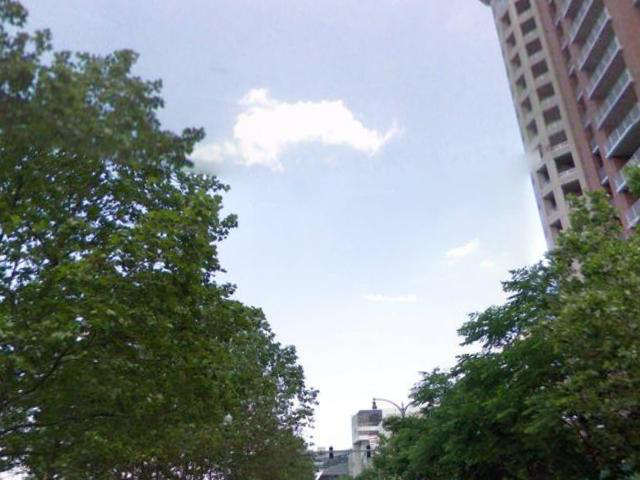

In [119]:
from PIL import Image               # to load images
from IPython.display import display # to display images
from random import choice

image_path = data_path+'/images/train/database/'+choice(os.listdir(data_path+'/images/train/database/'))
Image.open(image_path)